# The Polynomial Kernel and its VC Dimension

In this notebook, I will create various synthetic datasets, and explore how changing the hyperparameters of the perceptron hypothesis class with the polynomial kernel (also called feature map) affects the statistical performance - plotting how the VC dimension grows, seeing whether we're overfitting. 

## The perceptron learning algorithm and polynomial kernel 


The perceptron algorithm is:

$h(\vec{x_n})= \text{sign}((\sum_{i=1}^{d}w_ix_i)+b)$

so its hypothesis class can also we written as: 

$H = \{\vec{x} \mapsto \text{sign}(w^T \vec{x}) : w \in \mathbb{R}^{1}\}$ 

where the hypotheses that we're testing is what the weight vector $\vec{w}_n$ should be - thus, our hypothesis class has dimensions $\mathbb{R}^d$. A feature map is applied to the hypothesis class, and is a function $\Phi: \mathbb{R}^d \to \mathbb{R}^{\tilde{d}}$

so that our hypothesis class becomes: 

$H_{\Phi} = \{\vec{x} \mapsto \text{sign}(w^T \Phi(\vec{x})) : w \in \mathbb{R}^{\tilde{d}}\}$ 

A polynomial feature maps is a specific kind of feature map. A polynomial kernel of degree $Q$, denoted $\Phi_Q$, has one feature for each of the $Q$ degree monomials formed by the input data dimensions. For example, if we have a vector $\vec{x} = (x_1, x_2)$, then our second-degree polynomial map would be: 

$\Phi_2(\vec{x}) = (x_1, x_2, x_1^2, x_2^2, x_1x_2) $

Polynomial feature maps allow us to use something linear like a perceptron learning algorithm, and continue to 

## VC dimension of perceptron w/ polynomial kernel applied 

For a perceptron algorithm in $d$ dimensions, after the polynomial kernel is applied to ,the $d_{VC}  = \Theta(d^Q)$. We define $E_{in}$ to be our in-sample error of the hypothesis, and $E_{out}$ to be the out-of-sample error on all other data, which we cannot calculate but can bound the generalization error with $|E_{in} - E_{out}| = O(\sqrt{\frac{d_{VC}}{N}})$, which then becomes $O(\sqrt{\frac{d^Q}{N}})$. 

## Some things to keep in mind when applying polynomial kernel

An industry rule of thumb for a good generalization error is to aim for $N = 10 d_{VC}$. Looking at our equation for generalization error, we notice that we also need to maitain a linear relationship between $d_{VC}$ and $N$; if $d_{VC}$ has doubled, then we need to double $N$ for the same generalization error. However, if our $d_{VC}$ is growing exponentially in $Q$ after a $Q$-degree polynomial feature map, then we will need a matching exponential growth in $N$, which may not be feasible. 

Overfitting is a strong possibility with the polynomial kernel, as the model complexity increases. In the next section, we'll see how quickly that happens by plotting the 


Let's get some code down for creating this polynomial feature map. 

In [2]:
# import standard python libraries libraries
import math
import numpy as np
np.random.seed(0)
import random
random.seed(0)
import time

# disable warnings
from warnings import filterwarnings
filterwarnings('ignore')
import os
os.environ["PYTHONWARNINGS"] = "ignore"

# import data mining libraries
import sklearn.linear_model

# import and configure plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['lines.markersize'] = 1
#plt.rcParams['figure.figsize'] = [9, 6]
#plt.rcParams['figure.dpi'] = 150

# configurations for my code
default_num_trials = 25
max_d = 2**14

In [4]:
def polynomial_kernel_embedding(x, p):
    '''
    Embeds the vector x into a higher dimensional space using the polynomial kernel of degree p.
    The output dimension is equal to the VC-dimension of Theta(min{p**d,d**p}), where d is the dimension of x.
    This is not an efficient implementation; it is designed for clarity.
    
    >>> polynomial_kernel_embedding(np.array([2]),1)
    array([2])
    >>> polynomial_kernel_embedding(np.array([2]),2)
    array([2, 4])
    >>> polynomial_kernel_embedding(np.array([2]),3)
    array([2, 4, 8])
    
    >>> polynomial_kernel_embedding(np.array([2,3]),1)
    array([2, 3])
    >>> polynomial_kernel_embedding(np.array([2,3]),2)
    array([2, 3, 4, 6, 9])
    >>> polynomial_kernel_embedding(np.array([2,3]),3)
    array([ 2,  3,  4,  6,  9,  8, 12, 18, 27])
    
    >>> polynomial_kernel_embedding(np.array(range(2)),10).shape
    (65,)
    >>> polynomial_kernel_embedding(np.array(range(3)),10).shape
    (285,)
    >>> polynomial_kernel_embedding(np.array(range(4)),10).shape
    (1000,)
    '''
    assert type(x) is np.ndarray
    assert len(x.shape) == 1
    assert type(p) is int
    assert p > 0
    
    d = x.shape[0]
    terms_per_degree = [ [ [i] for i in range(d) ] ]
    for i in range(1,p):
        deg_i_terms = []
        deg_i_minus1_terms = terms_per_degree[-1]
        for k in range(len(deg_i_minus1_terms)):
            for j in range(deg_i_minus1_terms[k][-1],d):
                deg_i_terms.append(deg_i_minus1_terms[k]+[j])
        terms_per_degree.append(deg_i_terms)
    
    terms = [ inner for outer in terms_per_degree for inner in outer ]
    
    values = []
    for term in terms:
        value = 1
        for i in term:
            value *= x[i]
        values.append(value)
    return np.array(values)
    
import doctest
doctest.testmod()

TestResults(failed=0, attempted=9)

## Plotting the growth of the VC dimension as Q increases

Let us see how the VC dimension grows as we go from $Q$ = 0 to $Q$ = 50 as $d$ stays constant. 

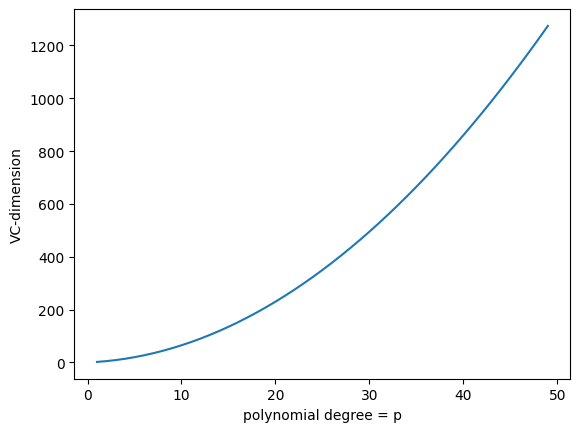

In [5]:
'''
This cell plots the VC-dimension of a halfspace with the polynomial kernel
as a function of the degree p with a fixed dimension d
'''
ps = range(1,50)
d = 2
vcdims = [ polynomial_kernel_embedding(np.ones([d]),p).shape for p in ps ]

fig, ax = plt.subplots()
plt.ylabel('VC-dimension')
plt.xlabel('polynomial degree = Q')
plt.plot(ps,vcdims)
plt.show()

Now, let us see how the VC dimension grows as we go from $d$ = 0 to $d$ = 50 as $Q$ stays constant. 

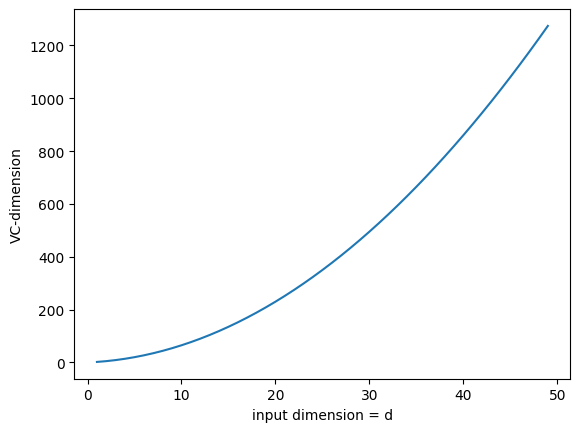

In [5]:
'''
This cell plots the VC-dimension of a halfspace with the polynomial kernel
as a function of the dimension d with a fixed p
'''
ds = range(1,50)
p = 2
vcdims = [ polynomial_kernel_embedding(np.ones([d]),p).shape for d in ds ]

fig, ax = plt.subplots()
plt.ylabel('VC-dimension')
plt.xlabel('input dimension = d')
plt.plot(ps,vcdims)
plt.show()

Notice that these graphs look quite similar - make sure not to increase the features of your data too much either, as that will similarly cause the same model complexity issues. 

## What shapes of data do different degree polynomials classify well?

We can use these hypotheses classes to create the data to then infer what kind of data they would be aply to classify! 

In [6]:
'''
This cell contains a number of functions for generating and visualizing datasets.
'''

def generate_dataset(m, d, f, sigma, seed=0):
    '''
    Returns a dataset with m data points of dimension d generated by:
    
        X ~ Uniform(-1, 1)
        Y = f(X) + epsilon, where epsilon ~ Normal(0,sigma)
        
    When sigma=0, there is no randomness in Y, and so the bayes error will be 0
    When sigma>0, there is randomness in Y, and so the bayes error > 0
    '''
    # set numpy's seed for reproducable results
    random.seed(seed)
    np.random.seed(seed)
    
    # ensure reasonable input parameters
    assert type(m) is int
    assert m>0
    
    # a helper function for generating labels
    def sign(a):
        if a>0:
            return 1
        else:
            return -1

    # generate the features
    X = np.random.uniform(low=-1.0,high=1.0,size=[m,d])

    # generate the labels
    Ys = []
    for i in range(m):
        epsilon = np.random.randn()*sigma
        yi = sign(f(X[i]) + epsilon)
        Ys.append(yi)
    Y = np.array(Ys)
    
    # return the dataset
    return (X,Y)


def f_polynomial(p, seed=0):
    '''
    Implements a polynomial embedding of degree $p$ to perform the data labeling.
    If the halfspace hypothesis class with the polynomial kernel of degree > p is used for learning,
    then the hypothesis class will be realizable.
    The input dimension $d$ must match the dimension of the dataspace $\mathcal X$
    '''
    phi = lambda x: polynomial_kernel_embedding(x, p)
    embedding_dim = phi(np.ones([d])).shape[0]
    np.random.seed(seed)
    #w = (np.array(range(embedding_dim))/embedding_dim)**0.01
    #w = np.ones([embedding_dim])/embedding_dim
    w = np.random.randn(max_d)/math.sqrt(embedding_dim)
    def f(x):
        phi_x = phi(x)
        w2 = w[:phi_x.shape[0]]
        return phi_x.transpose() @ w2
    return f
    
    
def f_checkers():
    '''
    This is another embedding function that creates a "checkers" pattern in the data.
    This embedding is not realizable for halfspaces with the polynomial kernel. 
    '''
    p = 4
    def f(x):
        return math.sin(x[0]*p)*math.sin(x[1]*p)
    return f

    
def f_circles():
    '''
    This is another embedding function that creates a pattern of concentric circles in the data.
    This embedding is not realizable for halfspaces with the polynomial kernel. 
    '''
    p = 4
    def f(x):
        return math.cos((x[0]*x[0]+x[1]*x[1])*p)
    return f
    

def plot_dataset(S):
    '''
    Plots the first two dimensions of the input dataset.
    '''
    X,Y = S
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],c=Y)
    #ax.scatter(X_pos[:,0], X_pos[:,1])
    #ax.scatter(X_neg[:,0], X_neg[:,1])
    ax.set_xlim(-1.0,1.0)
    ax.set_ylim(-1.0,1.0)
    plt.tight_layout()
    plt.show()

Let's start with $Q = 1$, and $d = 2$ so that we can visualize this data in a 2-d plane. As expected, the maximum degree in this would be 1 and therefore the graph is linear. 

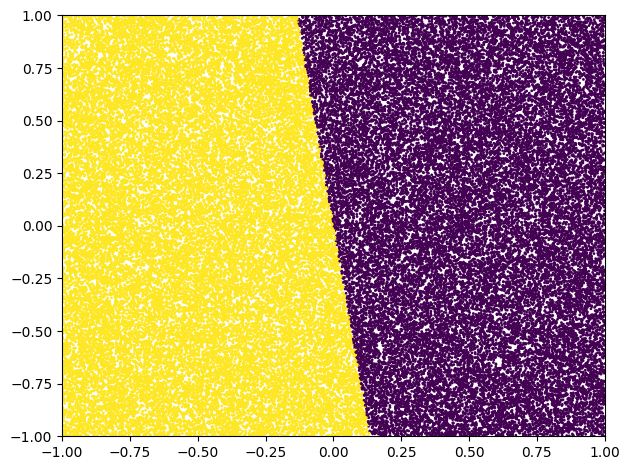

In [13]:
'''
This cell plots a dataset that has no randomness in the generation of class labels (sigma=0).
Using our notation from the textbook, this means that for each i, y_i = f(x_i).
When p=1 in the f_polynomial function, the data has a linear decision boundary.
'''

# these "hyperparameters" control the properties of the dataset
d = 2
sigma = 0
f = f_polynomial(p=1,seed=2)

# generate and plot dataset
S = generate_dataset(m=2**16,d=d,f=f,sigma=sigma)
plot_dataset(S)

If $Q$ = 2, we get a circle! To get a visualization of this in 3D, watch this video: https://www.youtube.com/watch?v=3liCbRZPrZA


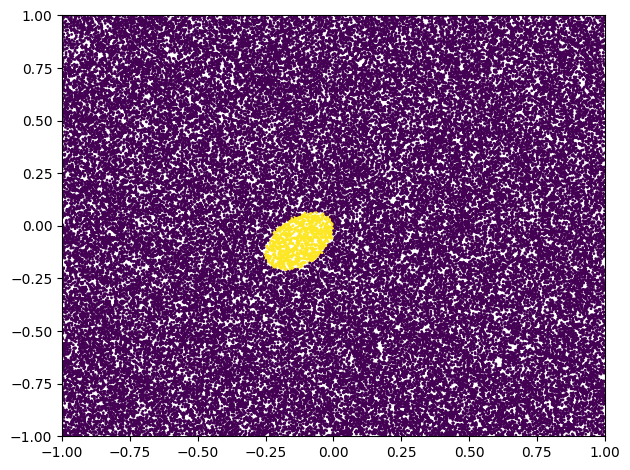

In [14]:
f = f_polynomial(p=2,seed=2)

# generate and plot dataset
S = generate_dataset(m=2**16,d=d,f=f,sigma=sigma)
plot_dataset(S)

### Question 2.1

*Regenerate the dataset above several times with degree $1 \le p \le 10$ to explore what decision boundaries for higher degree polynomials look like.
You should also change the `seed` value to generate different datasets with the same degree.*

*Write a 1-2 sentence summary of your findings.*

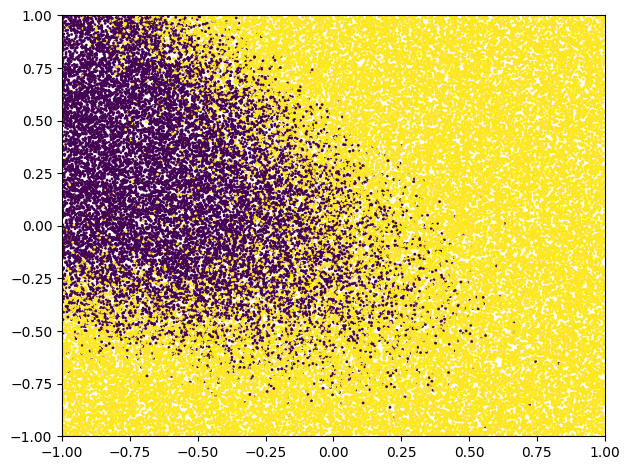

In [12]:
'''
This cell plots a dataset with randomness (sigma>0).
The sigma variable controls the amount of randomness applied to the model's label. 
'''

# these "hyperparameters" control the properties of the dataset
d = 2
sigma = 0.2
f = f_polynomial(2)

# generate and plot dataset
S = generate_dataset(m=2**16,d=d,f=f,sigma=sigma)
plot_dataset(S)

### Question 2.2

*Experiment with different combinations of sigma (and different p values) to see how the level of randomness effects the data.*

*Write a 1-2 sentence summary of your findings.*



In [ ]:
'''
This cell plots a dataset in the PAC model in higher dimensions.
Notice that even though there is no randomness in the labels,
there appears to be randomness when we only visualize the data in 2 dimensions.
'''

# these "hyperparameters" control the properties of the dataset
d = 4
sigma = 0
f = f_polynomial(d,2)

# generate and plot dataset
S = generate_dataset(m=2**16,d=d,f=f,sigma=sigma)
plot_dataset(S)    

### Question 2.3

*Experiment with different values of `d` in the dataset plotted above.
Also experiment with different values of `p` and `sigma`.
Notice that in high dimensions it is very difficult to tell if the data is linearly separable, or if the data contains any randomness.
Write 1-2 sentences explaining why this is the case.*

## Part 3: plotting the error as a function of the sample size $m$

NOTE: The textbook uses the variable $N$ to measure the total number of data points, but this notebook uses the variable $m$ to denote the number of data points.

In [ ]:
def calculate_err_vs_m(d, sigma, f, p, num_trials=default_num_trials):
    '''
    Plots the sample/true/generalization error for the halfspace with polynomial kernel model
    as a function of the number of sample training points.
    '''

    max_m_exp = 16
    m_buffer = 3
    
    # S_test is our test set used for measuring the model's performance;
    # It has a very large size to ensure that the empirical risk on S_test is very close to the true risk
    print('generating dataset... ',end='')
    S_test = generate_dataset(m=2**(max_m_exp+m_buffer),d=d,f=f,sigma=sigma)
    print('done')
    plot_dataset(S_test)

    # these lists store the computer training and test errors
    test_errs = []
    train_errs = []
    
    # This is the list of all sample sizes we will train models on and generate train/test errors;
    # by adjusting the range(), you can adjust the x-axis in the plots below.
    ms = [ 2**i for i in range(0,max_m_exp) ]

    for m in ms:
    #for p in [1,2,3,4,5,6,7]:

        # In order to "smooth" the plots, we will repeat each experiment multiple times
        # as deterimed by the num_trials parameter.
        # These lists store the raw results from each trial.
        trials_test_accs = []
        trials_train_accs = []
        
        # loop over each trial
        seed_base = 10
        time_start = time.time()
        for seed in range(seed_base,seed_base+num_trials):
            
            # generate a training set of size m
            # from the same distribution as our test set;
            # notice that we must explicitly set a unique seed for each trial so that
            # each iteration is actually running on a different training set
            S_train = generate_dataset(m=m,d=d,f=f,sigma=sigma,seed=seed)

            try:   
                # train a linear model;
                # notice that all of these models use the same hypothesis set of half spaces;
                # they only difference is that a different algorithm is used to select the hypothesis from the hypothesis class;
                # VC theory doesn't care about the training algorithm used to select the hypothesis from the class,
                # and so provides the same generalization bounds for all of these algorithms;
                # in practice, they all perform essentially the same statistically,
                # but they have different runtime characteristics in different situations
                X, Y = S_train
                X = np.apply_along_axis(lambda x: polynomial_kernel_embedding(x,p),1,X)
                #h_S = sklearn.linear_model.LogisticRegression(solver='liblinear',C=1e10)
                #h_S = sklearn.linear_model.Perceptron()
                h_S = sklearn.linear_model.SGDClassifier(penalty=None)
                #h_S = sklearn.linear_model.PassiveAggressiveClassifier()
                #h_S = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
                #h_S = sklearn.svm.LinearSVC()
                h_S.fit(X, Y)

                # calculate the training accuracy
                train_acc = h_S.score(X,Y)

                # calculate the test accuracy
                X, Y = S_test
                X = X[:min(2048,m_buffer*m)]
                Y = Y[:min(2048,m_buffer*m)]
                X = np.apply_along_axis(lambda x: polynomial_kernel_embedding(x,p),1,X)
                test_acc = h_S.score(X, Y)        

            # ValueError raised when there's not enough data to perform classification;
            # in this case, we get perfect training accuracy, but perfectly wrong test accuracy
            except ValueError:
                train_acc = 1
                test_acc = 0
                
            trials_test_accs.append(test_acc)
            trials_train_accs.append(train_acc)
        time_end = time.time()
        
        # compute the average of our trials
        train_acc = np.mean(trials_train_accs)
        test_acc = np.mean(trials_test_accs)
            
        # print a debugging statement for each iteration
        print('m=%8d,  train_acc=%0.4f,  test_acc=%0.4f,  time_diff=%dsec'%(
            m,
            train_acc,
            test_acc,
            time_end-time_start
        ))

        # convert the accuracies into errors and store them
        train_errs.append(1-train_acc)
        test_errs.append(1-test_acc)
    
    # plot the errors
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,5))
    ax1.set_xscale('log',basex=2)
    #ax1.set_yscale('log')
    ax1.set_ylim([0.0,1.0])
    ax1.set(
        xlabel='number of samples = m', 
        ylabel='train error = E_in(g)',
    )
    ax1.plot(ms,train_errs)
    
    ax2.set_xscale('log',basex=2)
    #ax2.set_yscale('log')
    ax2.set_ylim([0.0,1.0])
    ax2.set(
        xlabel='number of samples = m', 
        ylabel='test error ≈ E_out(g)',
    )
    ax2.plot(ms,test_errs)
    
    ax3.set_xscale('log',basex=2)
    ax3.set_yscale('log')
    ax3.set(
        xlabel='number of samples = m', 
        ylabel='generalization error = |E_in(g) - E_out(g)|',

    )
    ax3.plot(ms,np.abs(np.array(test_errs)-np.array(train_errs)))
    
    plt.tight_layout()
    plt.show()


In [ ]:
calculate_err_vs_m(
    d=2,
    sigma=0,
    f=f_polynomial(p=2),
    p=1,
)

In [ ]:
calculate_err_vs_m(
    d=2,
    sigma=0,
    f=f_polynomial(p=2),
    p=2,
)

In [ ]:
calculate_err_vs_m(
    d=2,
    sigma=0.2,
    f=f_polynomial(p=2),
    p=2,
)

### Definitions

We briefly introduce some common definitions that are not found in the textbook and we have not directly discussed in class.
These definitions will help us more succinctly state the following questions.
Another purpose of these definitions is to give you practice working with new definitions that you haven't seen explained before.
Data mining literature very frequently introduces new definitions that will be closely related,
but subtly different to definitions you've used before.

We call the "approximation error" of a hypothesis class to be the true error of the best possible model in the hypothesis class.
That is, the approximation error is
$$
E_{approx}(\mathcal{H}) = \text{argmin}_{h\in \mathcal H} E_{out}(h).
$$
Notice that the approximation error depends both on the hypothesis class chosen for learning, but also on the data distribution (since $E_{out}$ depends on the data distribution).
It does not, however, depend on the training data.

We call a hypothesis class "realizable" when the approximation error is 0.
That is, there exists some $h \in \mathcal H$ with $E_{out}(h) = 0$.
Notice that this definition is independent of the training data and the training algorithm.

### Question 3.1

*The three cells above plot the accuracy of the polynomial kernel in three situations:
when the model is not realizable because the degree of the polynomial is too small,
when the model is realizable,
and when the model is not realizable because of randomness in the labeling process.*

*Write 1-2 sentences about the differences you observe in each of these cases and how they relate to VC theory.*

In [ ]:
calculate_err_vs_m(
    d=2,
    sigma=0,
    f=f_checkers(),
    p=2,
)

### Question 3.2

*The dataset above is generated from the checkboard embedding instead of the polynomial embedding.
This implies that the polynomial embedding model is non-realizable for this problem.
Therefore, even when there is no randomness in the labeling process,
the model still cannot achieve 0 approximation error (i.e. $E_{out}(h)>0$ for all $h \in E_{out}(h)$.*

*Increasing the polynomial degree $p$ reduces the approximation error.
Try each value of $p$ starting at 1 until you reach an approximation error<1%.
What is that value of $p$?*

In [ ]:
calculate_err_vs_m(
    d=2,
    sigma=0,
    f=f_circles(),
    p=2,
)

### Question 3.3

*The dataset above is also not realizable, but in a different way than in question 3.2.
Once again, your task is to find the exact $p$ value that will achieve an approximation error<0.01%.*

## Part 4: plotting the error as a function of the sample size $d$

In [ ]:
def calculate_err_vs_d(m, sigma, f, p, max_dim_exponent, num_trials=default_num_trials):
    '''
    Plots the sample/true/generalization error for the halfspace with polynomial kernel model
    as a function of the number of sample training points.
    '''
    m_buffer = 3
    assert(2**max_dim_exponent<max_d)

    # these lists store the computer training and test errors
    test_errs = []
    train_errs = []
    
    # This is the list of all sample sizes we will train models on and generate train/test errors;
    # by adjusting the range(), you can adjust the x-axis in the plots below.
    ds = [ 2**i for i in range(0,max_dim_exponent) ]

    for d in ds:

        # In order to "smooth" the plots, we will repeat each experiment multiple times
        # as deterimed by the num_trials parameter.
        # These lists store the raw results from each trial.
        trials_test_accs = []
        trials_train_accs = []
        
        
        # loop over each trial
        seed_base = 10
        time_start = time.time()
        for seed in range(seed_base,seed_base+num_trials):
            
            # generate a training set of size m
            # from the same distribution as our test set;
            # notice that we must explicitly set a unique seed for each trial so that
            # each iteration is actually running on a different training set
            S_train = generate_dataset(m=m,d=d,f=f,sigma=sigma,seed=seed)
            S_test = generate_dataset(m=m,d=d,f=f,sigma=sigma,seed=seed-1)

            try:   
                # train a linear model;
                # notice that the training currently uses the LogisticRegression model;
                # all of the results will be essentially the same using the other linear models as well
                # since they all use the same hypothesis class
                X, Y = S_train
                X = np.apply_along_axis(lambda x: polynomial_kernel_embedding(x,p),1,X)
                h_S = sklearn.linear_model.LogisticRegression(solver='liblinear',C=1e1)
                #h_S = sklearn.linear_model.Perceptron()
                #h_S = sklearn.linear_model.SGDClassifier()
                #h_S = sklearn.linear_model.PassiveAggressiveClassifier()
                #h_S = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
                #h_S = sklearn.svm.LinearSVC()
                h_S.fit(X, Y)

                # calculate the training accuracy
                train_acc = h_S.score(X,Y)

                # calculate the test accuracy
                X, Y = S_test
                X = np.apply_along_axis(lambda x: polynomial_kernel_embedding(x,p),1,X)
                test_acc = h_S.score(X, Y)        

            # ValueError raised when there's not enough data to perform classification;
            # in this case, we get perfect training accuracy, but perfectly wrong test accuracy
            except ValueError:
                train_acc = 1
                test_acc = 0
                
            trials_test_accs.append(test_acc)
            trials_train_accs.append(train_acc)
        time_end = time.time()
        
        # compute the average of our trials
        train_acc = np.mean(trials_train_accs)
        test_acc = np.mean(trials_test_accs)
            
        # print a debugging statement for each iteration
        print('d=%8d,  train_acc=%0.4f,  test_acc=%0.4f,  time_diff=%dsec'%(
            d,
            train_acc,
            test_acc,
            time_end-time_start
        ))

        # convert the accuracies into errors and store them
        train_errs.append(1-train_acc)
        test_errs.append(1-test_acc)
    
    # plot the errors
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,5))
    ax1.set_xscale('log',basex=2)
    #ax1.set_yscale('log')
    ax1.set(
        xlabel='number of dimensions = d', 
        ylabel='train error = E_in(g)',
    )
    ax1.plot(ds,train_errs)
    
    ax2.set_xscale('log',basex=2)
    #ax2.set_yscale('log')
    ax2.set(
        xlabel='number of dimensions = d', 
        ylabel='test error ≈ E_out(g)',
    )
    ax2.plot(ds,test_errs)
    
    ax3.set_xscale('log',basex=2)
    ax3.set_yscale('log')
    ax3.set(
        xlabel='number of dimensions = d', 
        ylabel='generalization error = |E_in(g) - E_out(g)|',

    )
    ax3.plot(ds,np.abs(np.array(test_errs)-np.array(train_errs)))
    
    plt.tight_layout()
    plt.show()


In [ ]:
calculate_err_vs_d(
    m = 512,
    sigma = 0.1,
    f = f_polynomial(p=1),
    p = 1,
    max_dim_exponent=12,
)

### Question 4.1

*How does increasing the dimension $d$ of the input space affect the errors of the model?
How does VC theory predict this behavior?*


In [ ]:
calculate_err_vs_d(
    m = 512,
    sigma = 0.1,
    f = f_polynomial(p=2),
    p = 1,
    max_dim_exponent=8
)

### Question 4.2

*The plot above is generated using almost the same formula as the plot for 4.1.
The exception is that the $f$ function is more complicated (polynomial degree 2 instead of degree 1).
What effect does this have on the the errors?*

## Part 5: plotting the error as a function of the polynomial degree

### Question 5.1

The goal of this question is to demonstrate that large degree polynomial embeddings overfit.
This will require writing a new function `calculate_err_vs_p` that is based off of `calculate_err_vs_m` and `calculate_err_vs_d`.
Plot the train, test, and generalization errors as a function of `p`.
You should find that "small" and "large" values both generate large test errors,
and "medium" values of `p` generate small test errors.

I recommend using values of `m = 32`, `d = 8`, `sigma = 0.0`, and `f = f_polynomial(p=2)`.
Adjust the value of the `p` variable starting at `1` and going large enough to see the pattern of overfitting.